In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

gen_fec = pd.read_excel('BASE_GENEROS.xlsx')
gen_fec.dtypes
gen_fec.index = gen_fec['gen']

#primeiro fecal
fec = gen_fec.loc[['Bacillus', 'Clostridium', 'Enterococcus', 'Klebsiella', 'Vibrio',
'Escherichia', 'Bacteroides', 'Enterobacter', 'Enterococcus',
                   'Citrobacter', 'Akkermansia', 'Parabacteroides', 'Anaerostipes', 
'Eubacterium', 'Methanobrevibacter', 'Clostridioides', 'Enterobacter', 'Enterocloster', 'Enterococcus', 
'Salmonella', 'Staphylococcus', 'Streptococcus', 'Campylobacter', 'Listeria', 'Helicobacter', 
'Yersinia', 'Pseudomonas', 'Aeromonas', 'Eubacterium', 'Leptospira', 'Serratia', 'Arcobacter'],:]

fec = fec.drop(columns ='gen')

#segundo ciano
ciano = gen_fec.loc[['Anabaena', 'Aphanizomenon', 'Coleofasciculus', 'Dolichospermum', 
'Microcystis', 'Nostoc', 'Oscillatoria','Planktothrix', 'Synechocystis', 'Nodularia',
'Aphanothece', 'Phormidium'],:]

ciano = ciano.drop(columns ='gen')

#transposição
ciano = ciano.T
fec = fec.T

#K-means + dendograma (geral, completo em outro pynb)
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
X = np.array(ciano)
y = np.array(fec)
kmeans = KMeans(n_clusters=3, random_state=0)


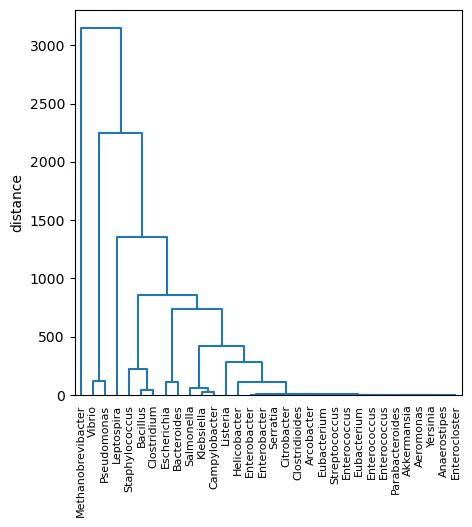

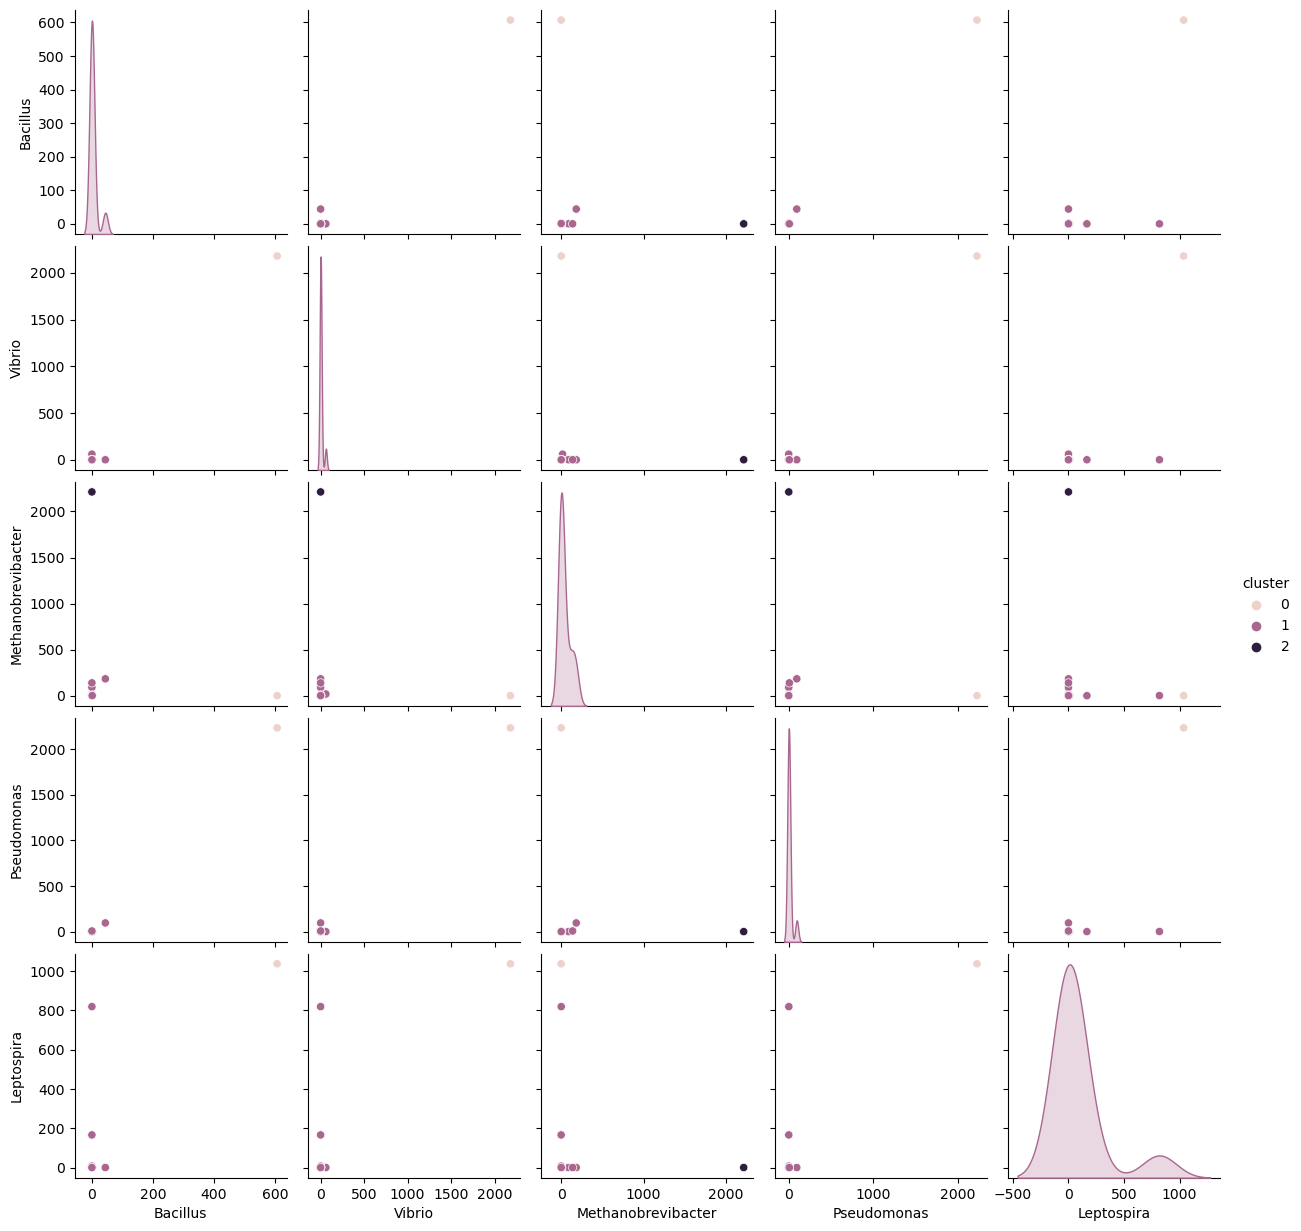

In [17]:
#k-means fecal
kmeans.fit(y)
kmeans.labels_
fec['cluster'] = kmeans.labels_
centers = pd.DataFrame(kmeans.cluster_centers_, columns=['Bacillus', 'Clostridium', 'Enterococcus', 'Klebsiella', 'Vibrio',
'Escherichia', 'Bacteroides', 'Enterobacter', 'Enterococcus',
                   'Citrobacter', 'Akkermansia', 'Parabacteroides', 'Anaerostipes', 
'Eubacterium', 'Methanobrevibacter', 'Clostridioides', 'Enterobacter', 'Enterocloster', 'Enterococcus', 
'Salmonella', 'Staphylococcus', 'Streptococcus', 'Campylobacter', 'Listeria', 'Helicobacter', 
'Yersinia', 'Pseudomonas', 'Aeromonas', 'Eubacterium', 'Leptospira', 'Serratia', 'Arcobacter'])

#Dendograma
fecd = fec.drop(columns=['cluster'])
fecd = fecd.T
W = linkage(fecd, method='complete')
fig, ax = plt.subplots(figsize=(5, 5))
dendrogram(W, labels=fecd.index, ax=ax, color_threshold=0)
plt.xticks(rotation=90)
ax.set_ylabel('distance')
#Seaborn
fezin = fec.loc[:,['Bacillus', 'Vibrio','Methanobrevibacter', 'Pseudomonas', 'Leptospira','cluster']]
ge = sb.pairplot(fezin, hue ="cluster")
#ge.savefig("seaborn_2_fecin.png", dpi=400)

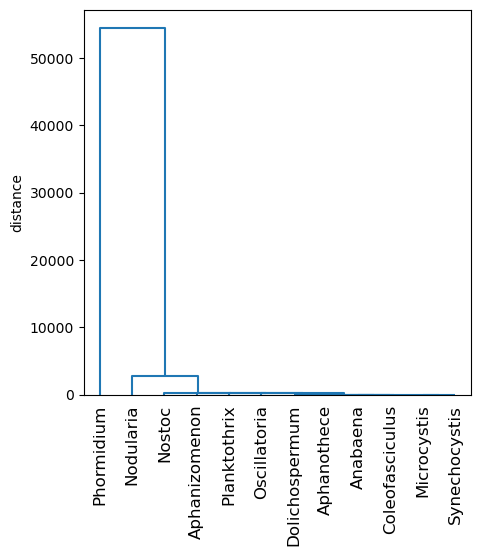

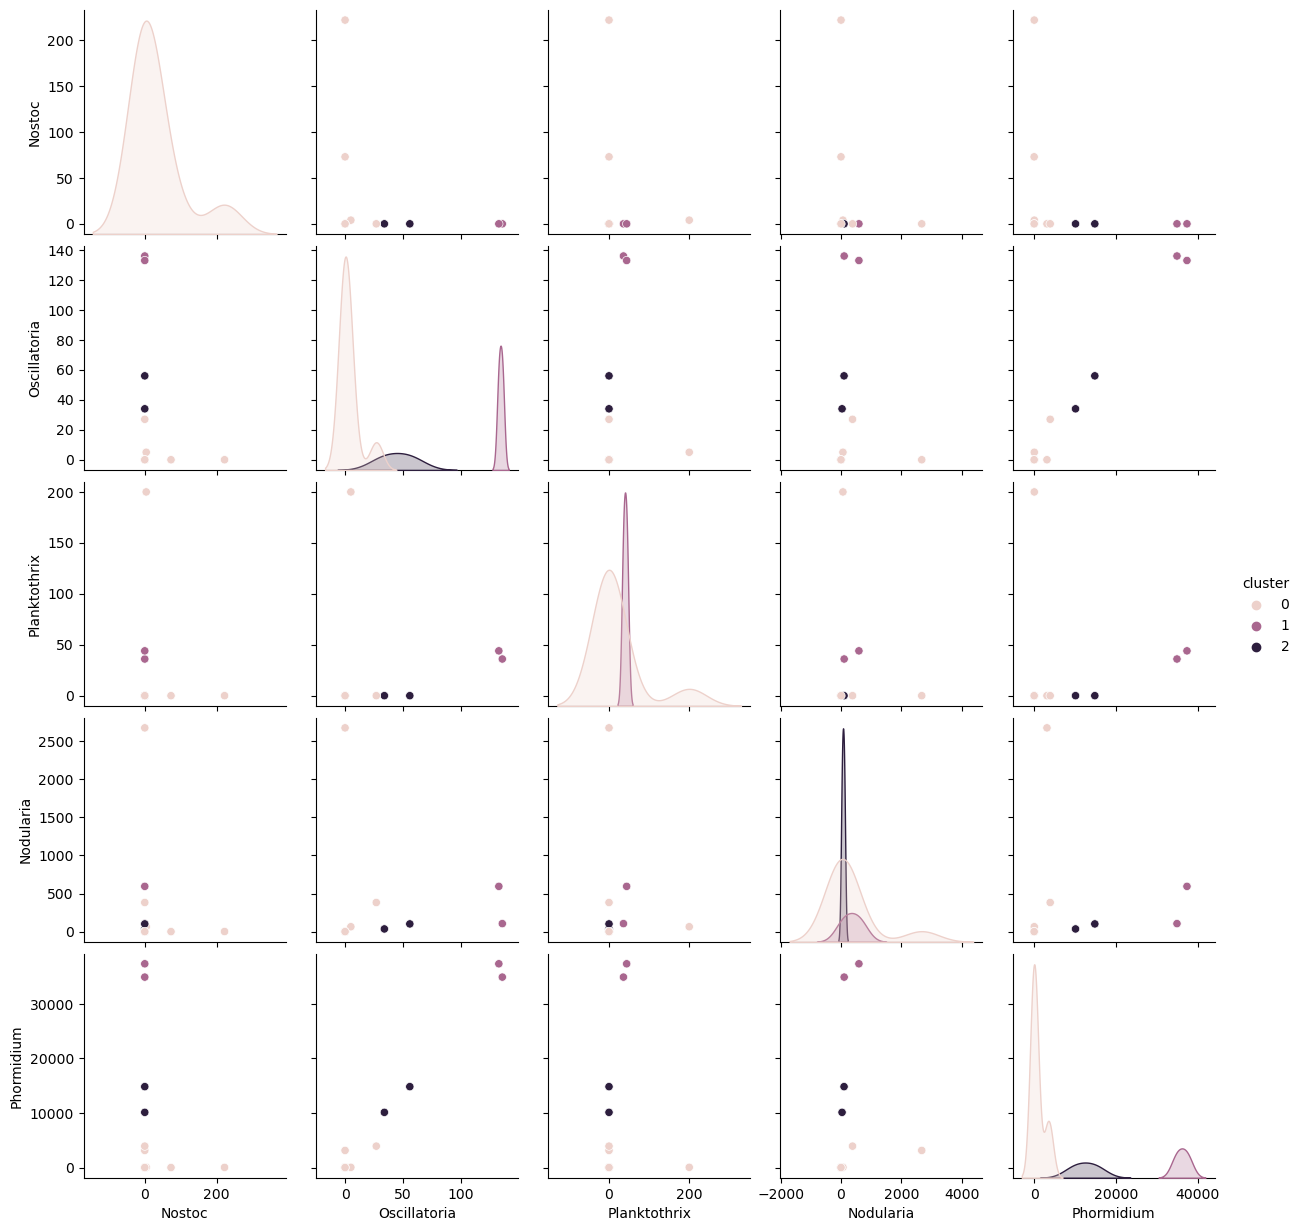

In [23]:
#k-means ciano
kmeans.fit(X)
kmeans.labels_
ciano['cluster'] = kmeans.labels_
centers = pd.DataFrame(kmeans.cluster_centers_, columns=['Anabaena', 'Aphanizomenon', 'Coleofasciculus', 'Dolichospermum', 
'Microcystis', 'Nostoc', 'Oscillatoria','Planktothrix', 'Synechocystis', 'Nodularia',
'Aphanothece', 'Phormidium'])
#Dendograma
cianod = ciano.drop(columns=['cluster'])
cianod = cianod.T
Z = linkage(cianod, method='complete')
fig, ax = plt.subplots(figsize=(5, 5))
dendrogram(Z, labels=cianod.index, ax=ax, color_threshold=0)
plt.xticks(rotation=90)
ax.set_ylabel('distance')

#Seaborn
cianin = ciano.loc[:,['Nostoc', 'Oscillatoria','Planktothrix', 'Nodularia', 'Phormidium', 'cluster']]

gi = sb.pairplot(cianin, hue ="cluster")
#gi.savefig("seaborn_2_cian.png", dpi=400)

<AxesSubplot:xlabel='Pontos de Coleta'>

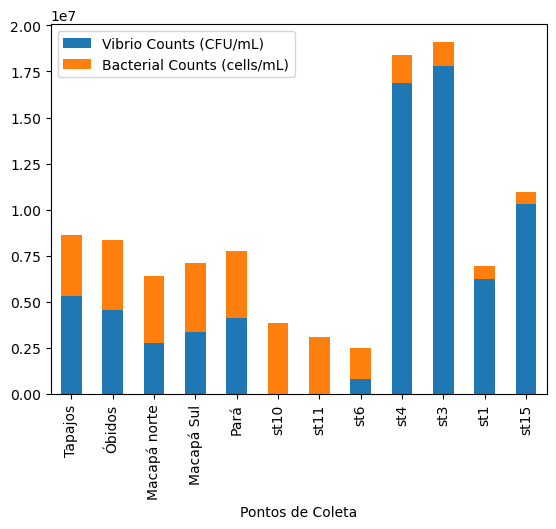

In [21]:
#depois vai fazer aqui uns graficos matplot + pivottable + crosstable!
meta = pd.read_excel('graficos.xlsx', sheet_name='meta')
meta.index = meta['Pontos de Coleta']
meta = meta.drop(columns ='Pontos de Coleta')
meta_test = meta.loc[:,['Vibrio Counts (CFU/mL)','Bacterial Counts (cells/mL)']]
meta_test.plot.bar(stacked=True)


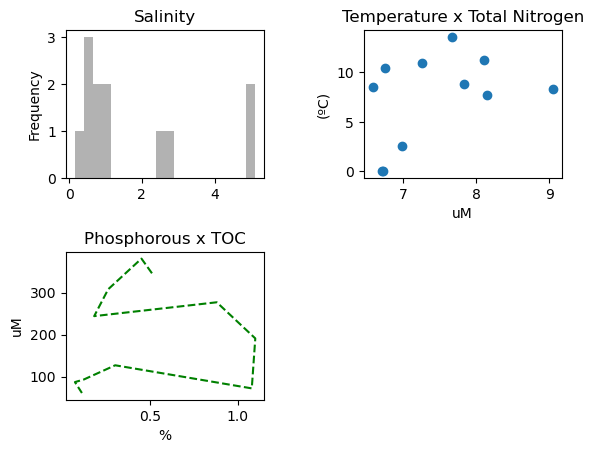

In [11]:

meta = pd.read_excel('graficos.xlsx', sheet_name='meta')
meta
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax1.hist(meta['Salinity'], bins=20, color="black", alpha=0.3)
ax2.scatter(meta['Temperature (°C)'], meta['Total Nitrogen (µM)'])
ax3.plot(meta['Organic phosphorous'], meta['TOC(%)'], linestyle="--", color="green")
ax1.set(title='Salinity',ylabel='Frequency')
ax2.set(title='Temperature x Total Nitrogen', ylabel = "(ºC)", xlabel="uM")
ax3.set(title='Phosphorous x TOC', ylabel = "uM", xlabel="%")
fig.subplots_adjust(wspace=0.5, hspace=0.5)


In [30]:
meta = pd.read_excel('graficos.xlsx', sheet_name='meta')

meta.pivot_table(index=['Pontos de Coleta', "TOC(%)"])
#o cross table é ideal para dados categoricos, não é o caso
#pd.crosstab(meta['Pontos de Coleta'], meta["TOC(%)"], meta['Temperature (°C)'], margins=True)

,,Bacterial Counts (cells/mL),Chlorophyll A (µg/L),Condutivity,Nitrite (µM),Organic phosphorous,Phaeophytin (µM),Salinity,Silicate (µM),Temperature (°C),Total Nitrogen (µM),Turbity (NTU),Vibrio Counts (CFU/mL),Viral Abundance,pCO2sw
Pontos de Coleta,TOC(%),,,,,,,,,,,,,,
Macapá Sul,308,3770000,17.90,5.08,1.350,0.26,144.00,0.700,0.02,6.71,0.0,29.30,3340000.0,0.89,4673
Macapá norte,308,3630000,17.90,4.75,1.350,0.26,144.00,0.870,0.02,6.72,0.0,29.50,2760000.0,0.76,4786
Pará,244,3640000,7.75,6.20,3.120,0.18,109.00,2.830,0.02,6.99,2.6,29.60,4110000.0,1.13,2013
Tapajos,346,3270000,5.64,5.54,1.470,0.51,130.00,5.120,0.01,6.75,10.4,30.10,5340000.0,1.63,1039
st1,87,681000,0.00,7.12,0.000,0.07,12.90,0.160,31.56,8.03,NaN,28.44,6240000.0,9.16,368
st10,277,3850000,9.58,6.45,0.180,0.88,39.20,0.640,0.11,7.26,11.0,28.70,NaN,NaN,831
st11,191,3070000,8.52,5.54,0.014,1.10,28.30,2.490,12.17,7.67,13.6,28.50,NaN,NaN,515
st15,61,634000,0.50,7.28,0.000,0.11,0.25,0.910,36.34,9.05,8.3,28.40,10300000.0,16.25,390
st3,93,1300000,0.00,7.37,0.230,0.12,22.50,0.535,24.44,8.15,7.7,29.27,17800000.0,13.59,234


In [18]:
fec

gen,Bacillus,Clostridium,Enterococcus,Klebsiella,Vibrio,Escherichia,Bacteroides,Enterobacter,Enterococcus,Citrobacter,...,Listeria,Helicobacter,Yersinia,Pseudomonas,Aeromonas,Eubacterium,Leptospira,Serratia,Arcobacter,cluster
St10,0,0,0,0,60,0,27,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Tap,0,0,0,0,0,556,643,11,0,0,...,0,114,0,0,0,0,0,4,0,2
St3,0,0,0,0,0,0,0,0,0,0,...,159,0,0,1,0,0,0,0,0,1
St4,0,0,0,0,0,0,3,0,0,1,...,209,0,0,0,0,0,3,0,0,1
St5,0,0,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,819,0,0,1
MacapaSul,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
MacapaNorte,44,0,0,0,0,0,0,0,0,0,...,0,0,0,95,0,0,0,0,0,1
St1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,166,0,0,1
St11,1,1,0,0,1,0,18,0,0,0,...,2,0,1,0,1,0,0,0,0,1
St15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,7,0,0,1


In [4]:
import numpy as np
kmeans.fit(y)
kmeans.labels_

mat1 = fec.values
mat1

mat2 = pd.read_excel('graficos.xlsx', sheet_name='PCA_fec')
mat2 = mat2.values
mat2

pc_fec = np.dot(mat1,mat2)
pc_fec

pc_fec_df = pd.DataFrame(data = pc_fec, 
                        index = fec.index, 
                        columns = ["comp1",
                                   "comp2"])

fec_pca = fec.join(pc_fec_df)

fec_pca['cluster'] = kmeans.labels_

fec_pca

,Bacillus,Clostridium,Enterococcus,Klebsiella,Vibrio,Escherichia,Bacteroides,Enterobacter,Enterococcus,Citrobacter,...,Yersinia,Pseudomonas,Aeromonas,Eubacterium,Leptospira,Serratia,Arcobacter,comp1,comp2,cluster
St10,0,0,0,0,60,0,27,0,0,0,...,0,0,0,0,0,0,0,36.424101,26.713152,1
Tap,0,0,0,0,0,556,643,11,0,0,...,0,0,0,0,0,4,0,-138.584323,2365.379872,2
St3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,-0.529048,-2.762427,1
St4,0,0,0,0,0,0,3,0,0,1,...,0,0,0,0,3,0,0,-0.813801,-2.042817,1
St5,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,819,0,0,234.083385,-22.982856,1
MacapaSul,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,-8.325876,83.351424,1
MacapaNorte,44,0,0,0,0,0,0,0,0,0,...,0,95,0,0,0,0,0,50.203676,174.373918,1
St1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,166,0,0,47.338884,-4.851682,1
St11,1,1,0,0,1,0,18,0,0,0,...,1,0,1,0,0,0,0,1.798275,12.447690,1
St15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,7,0,0,1.996218,-0.204589,1


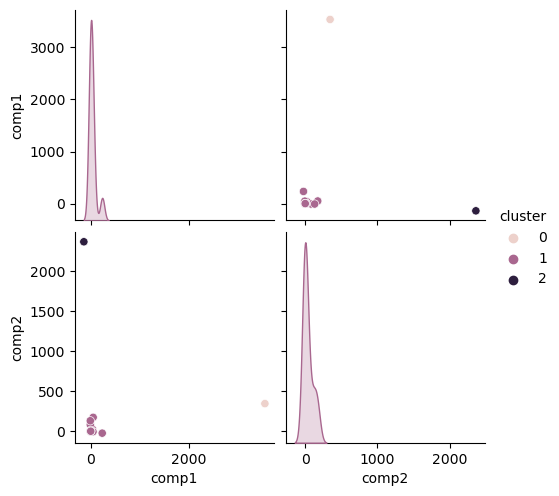

In [5]:
graf = fec_pca.loc[:,["comp1","comp2","cluster"]]

sb.pairplot(graf, hue ="cluster")